<a href="https://colab.research.google.com/github/ktmshyamal/face_mask_detection/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model - VGG16

In [1]:
!git clone https://github.com/ktmshyamal/face_mask_detection.git
%cd face_mask_detection

Cloning into 'face_mask_detection'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 2), reused 8 (delta 1), pack-reused 0
Unpacking objects: 100% (9/9), done.
/content/face_mask_detection


## Imports

In [2]:
from tensorflow import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import numpy as np
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model

## Data Generator

In [3]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/MyDrive/VGG16/Dataset/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/MyDrive/VGG16/Dataset/test", target_size=(224,224))

Found 5800 images belonging to 2 classes.
Found 1753 images belonging to 2 classes.


## Model definition

In [10]:
# vgg16 = VGG16(input_shape=[224,224,3], weights='imagenet', include_top=False)

# for layer in vgg16.layers:
#   layer.trainable = False
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [11]:
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

Callbacks

In [23]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

hist = model.fit_generator(steps_per_epoch=30,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


30/30 [==============================] - ETA: 0s - loss: 0.7686 - accuracy: 0.6073
Epoch 1: val_accuracy improved from -inf to 0.72812, saving model to vgg16_1.h5
30/30 [==============================] - 12s 331ms/step - loss: 0.7686 - accuracy: 0.6073 - val_loss: 0.5384 - val_accuracy: 0.7281
Epoch 2/100
30/30 [==============================] - ETA: 0s - loss: 0.5816 - accuracy: 0.7105
Epoch 2: val_accuracy improved from 0.72812 to 0.82187, saving model to vgg16_1.h5
30/30 [==============================] - 7s 251ms/step - loss: 0.5816 - accuracy: 0.7105 - val_loss: 0.4722 - val_accuracy: 0.8219
Epoch 3/100
30/30 [==============================] - ETA: 0s - loss: 0.4926 - accuracy: 0.7778
Epoch 3: val_accuracy did not improve from 0.82187
30/30 [==============================] - 8s 274ms/step - loss: 0.4926 - accuracy: 0.7778 - val_loss: 0.4803 - val_accuracy: 0.7812
Epoch 4/100
30/30 [==============================] - ETA: 0s - loss: 0.4632 - accuracy: 0.8062

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "



Epoch 4: val_accuracy did not improve from 0.82187
30/30 [==============================] - 9s 303ms/step - loss: 0.4632 - accuracy: 0.8062 - val_loss: 0.4524 - val_accuracy: 0.8156
Epoch 5/100
30/30 [==============================] - ETA: 0s - loss: 0.4397 - accuracy: 0.8073
Epoch 5: val_accuracy did not improve from 0.82187
30/30 [==============================] - 8s 262ms/step - loss: 0.4397 - accuracy: 0.8073 - val_loss: 0.4431 - val_accuracy: 0.7969
Epoch 6/100
30/30 [==============================] - ETA: 0s - loss: 0.4363 - accuracy: 0.8205
Epoch 6: val_accuracy did not improve from 0.82187
30/30 [==============================] - 7s 228ms/step - loss: 0.4363 - accuracy: 0.8205 - val_loss: 0.4707 - val_accuracy: 0.7812
Epoch 7/100
30/30 [==============================] - ETA: 0s - loss: 0.4189 - accuracy: 0.8219
Epoch 7: val_accuracy improved from 0.82187 to 0.83750, saving model to vgg16_1.h5
30/30 [==============================] - 9s 316ms/step - loss: 0.4189 - accuracy: 0.8

## Accuracy Graphs


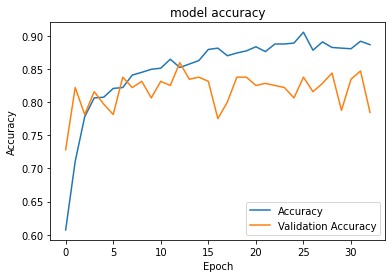

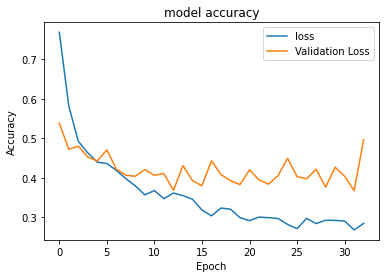

In [24]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

Without Mask


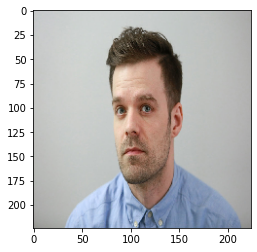

In [25]:
img = image.load_img("/content/without_mask_2.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("With Mask")
else:
    print('Without Mask')

# Testing

In [26]:
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from google.colab.patches import cv2_imshow

faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
model = load_model("/content/face_mask_detection/vgg16_1.h5")

def face_mask_detector(frame):
  # frame = cv2.imread(fileName)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray,
                                        scaleFactor=1.1,
                                        minNeighbors=5,
                                        minSize=(60, 60),
                                        flags=cv2.CASCADE_SCALE_IMAGE)
  faces_list=[]
  preds=[]
  for (x, y, w, h) in faces:
      face_frame = frame[y:y+h,x:x+w]
      face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
      face_frame = cv2.resize(face_frame, (224, 224))
      face_frame = img_to_array(face_frame)
      face_frame = np.expand_dims(face_frame, axis=0)
      face_frame =  preprocess_input(face_frame)
      faces_list.append(face_frame)
      if len(faces_list)>0:
          preds = model.predict(faces_list)
      for pred in preds:
          (mask, withoutMask) = pred
      label = "Mask" if mask > withoutMask else "No Mask"
      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
      cv2.putText(frame, label, (x, y- 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

      cv2.rectangle(frame, (x, y), (x + w, y + h),color, 3)
  # cv2_imshow(frame)
  return frame

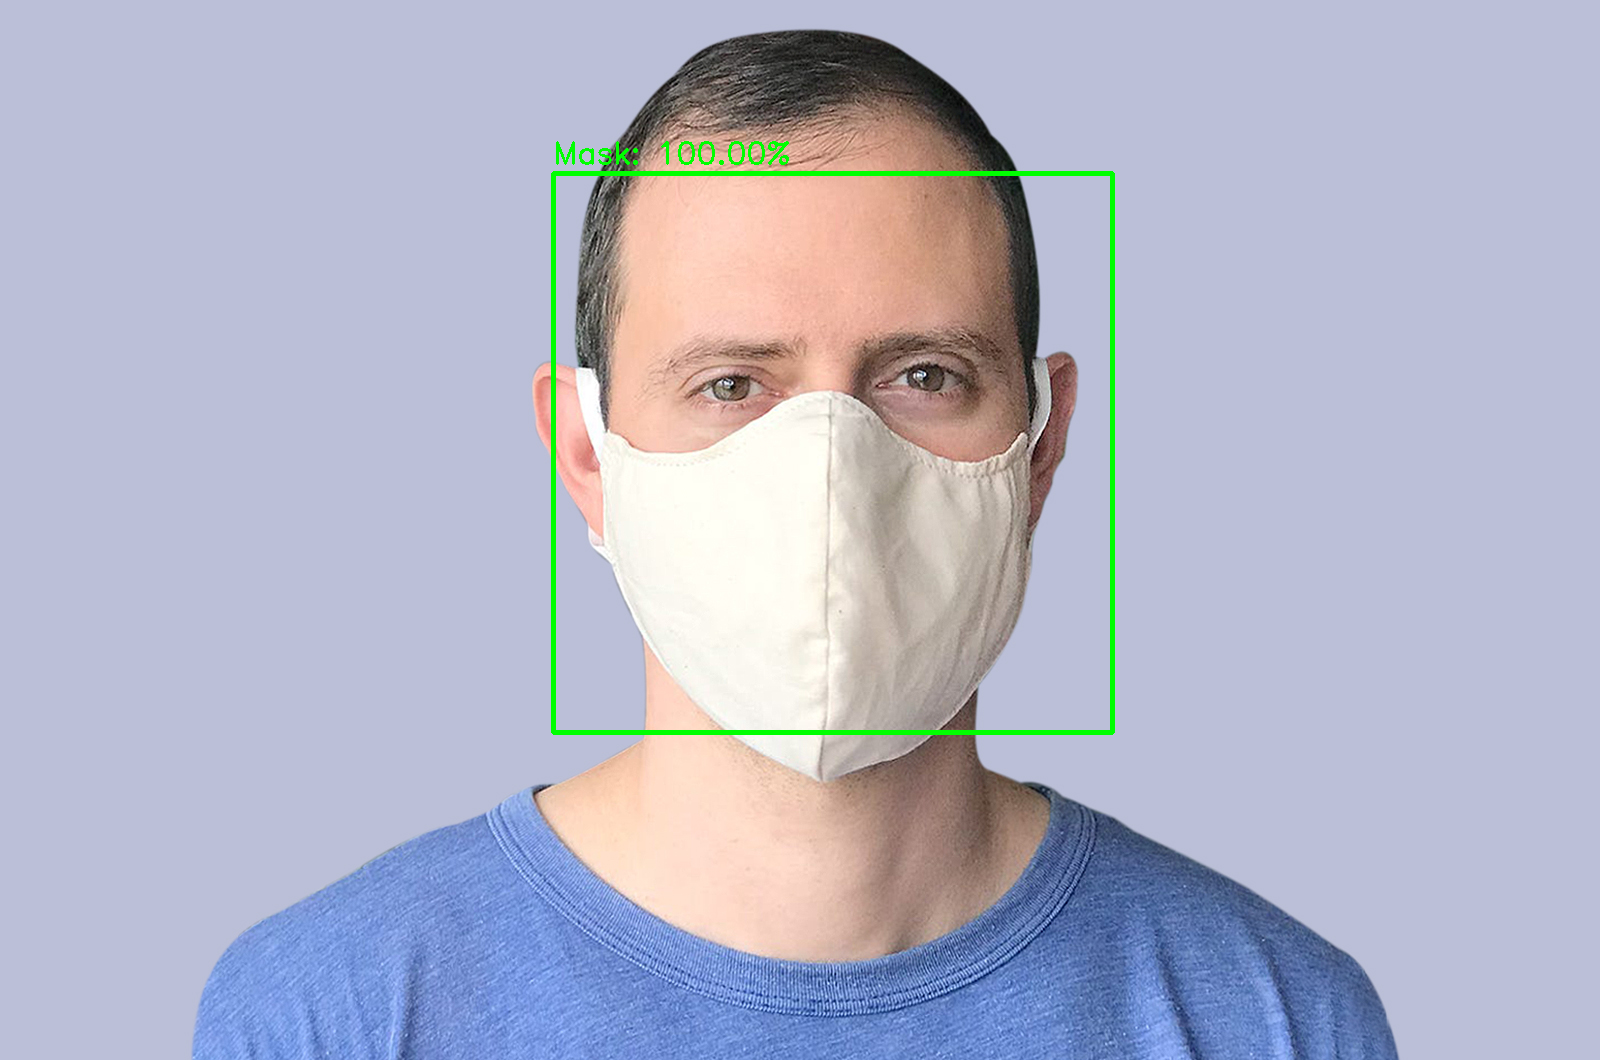

In [28]:
input_image = cv2.imread("/content/image01.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

In [ ]:
input_image = cv2.imread("without_mask_1.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

In [ ]:
input_image = cv2.imread("without_mask_2.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)